<a href="https://colab.research.google.com/github/akc3497/Text-2-Image/blob/main/Text_2_Image_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Text-To-Image Using Sentence Transformers**

In [3]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
model = SentenceTransformer('clip-ViT-B-32')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

In [5]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

--2024-08-14 07:33:18--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1922426838 (1.8G) [application/zip]
Saving to: ‘unsplash-25k-photos.zip’

unsplash-25k-photos 100%[===================>]   1.79G  14.7MB/s    in 1m 59s  

2024-08-14 07:35:17 (15.4 MB/s) - ‘unsplash-25k-photos.zip’ saved [1922426838/1922426838]



In [6]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

Streaming output truncated to the last 5000 lines.
  inflating: photos/ErnD0oSB9OE.jpg  
  inflating: photos/CLMlVwtPsI4.jpg  
  inflating: photos/7by0hnrUBP8.jpg  
  inflating: photos/XWARm1Wgg4U.jpg  
  inflating: photos/m_x26CPIjic.jpg  
  inflating: photos/Or9vxPAGtXw.jpg  
  inflating: photos/asr62h5w66w.jpg  
  inflating: photos/oPubZ53L5OE.jpg  
  inflating: photos/AENmGl9JVgs.jpg  
  inflating: photos/kR1Aer8c_WI.jpg  
  inflating: photos/YCniL3n_B7Q.jpg  
  inflating: photos/pg5CVv0FEBU.jpg  
  inflating: photos/jynDaAkI0H8.jpg  
  inflating: photos/QP64OlGcfcQ.jpg  
  inflating: photos/a_nu2fRoqwI.jpg  
  inflating: photos/HeerZLfH4h8.jpg  
  inflating: photos/7TGVEgcTKlY.jpg  
  inflating: photos/fN2pzLWtG6A.jpg  
  inflating: photos/lpxXl5Ssung.jpg  
  inflating: photos/yan5Aj6crIU.jpg  
  inflating: photos/9Phn7Dwz2PM.jpg  
  inflating: photos/9TRaDtl7Z5U.jpg  
  inflating: photos/QeZuoNqtj9I.jpg  
  inflating: photos/lLUbQBbf6Bc.jpg  
  inflating: photos/rmFs3k34JLI.jpg  

In [12]:
img_names = list(glob.glob('photos/*.jpg'))
print(len(img_names))

24996


In [ ]:
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/782 [00:00<?, ?it/s]

In [ ]:
img_folder = '/photos'

def search(query, k=3):
  query_emd = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

  hits = util.semantic_search(query_emd, img_embed, top_k=k)[0]
  print(hits)

  print("Query: ", query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

[{'corpus_id': 364, 'score': 0.2917233109474182}, {'corpus_id': 1868, 'score': 0.24404510855674744}, {'corpus_id': 1576, 'score': 0.23205293715000153}]
Query:  man on the train
photos/5fsZ4ocgnpU.jpg


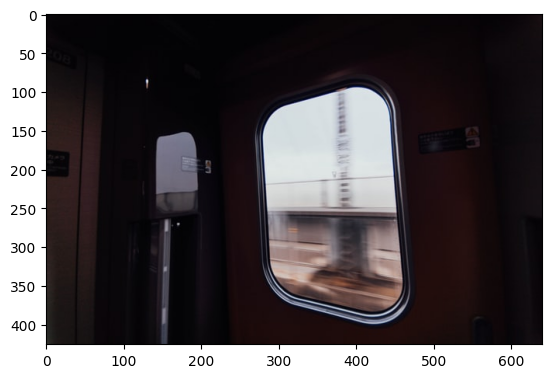

photos/7BRMAIPDjOQ.jpg


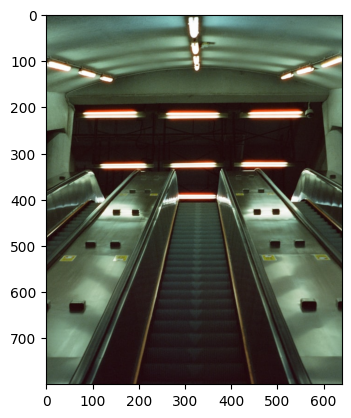

photos/peP3zrquunA.jpg


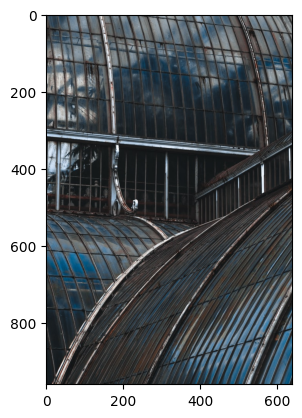

In [11]:
search('man on the train')